# K-Means Clustering vs PCA + K-Means on Housing Dataset

This notebook compares clustering performance using:
- K-Means on original scaled data
- PCA + K-Means on reduced data

Metrics used:
- SSE (Elbow Method)
- Silhouette Score
- Visualization



# Analyse PCA & K-Means sur les Données Housing

## Objectif du Notebook
Ce notebook a pour objectif :
- De **réduire la dimension des données** à l’aide de la **PCA (Analyse en Composantes Principales)**.
- D’**appliquer l’algorithme de clustering K-Means** sur les données originales et sur les données réduites.
- De **mesurer la qualité du clustering** à l’aide de plusieurs métriques (Silhouette, Davies-Bouldin, Calinski-Harabasz).
- De **visualiser les clusters** pour mieux comprendre la structure des données.

---

## Étapes de l'analyse
1. Chargement et exploration des données.
2. Standardisation des variables.
3. Application de la PCA.
4. Clustering avec K-Means.
5. Évaluation des performances.
6. Visualisation des résultats.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

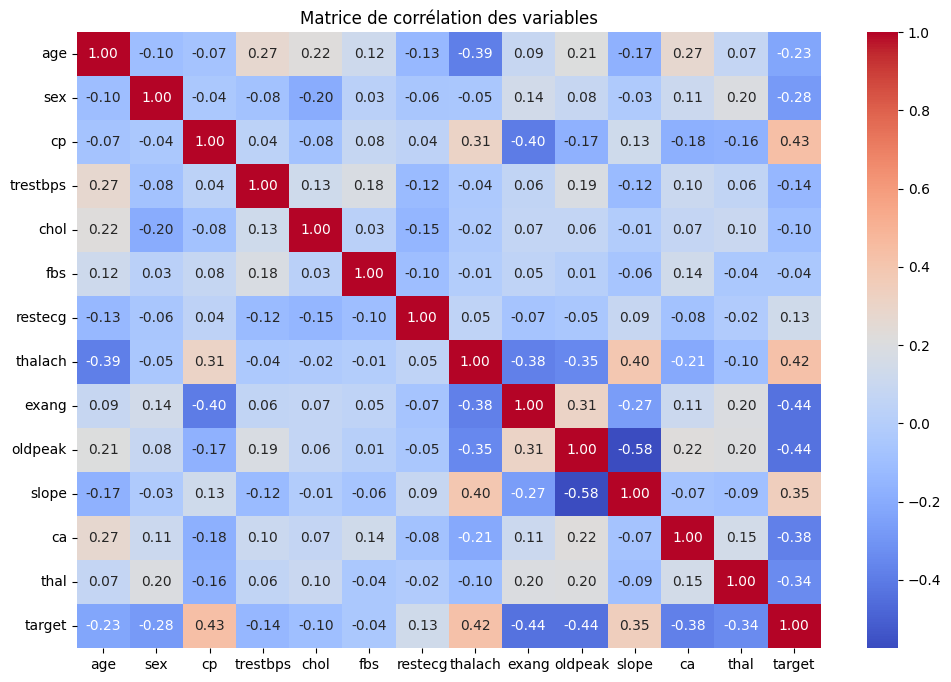

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matrice de corrélation des variables")
plt.show()


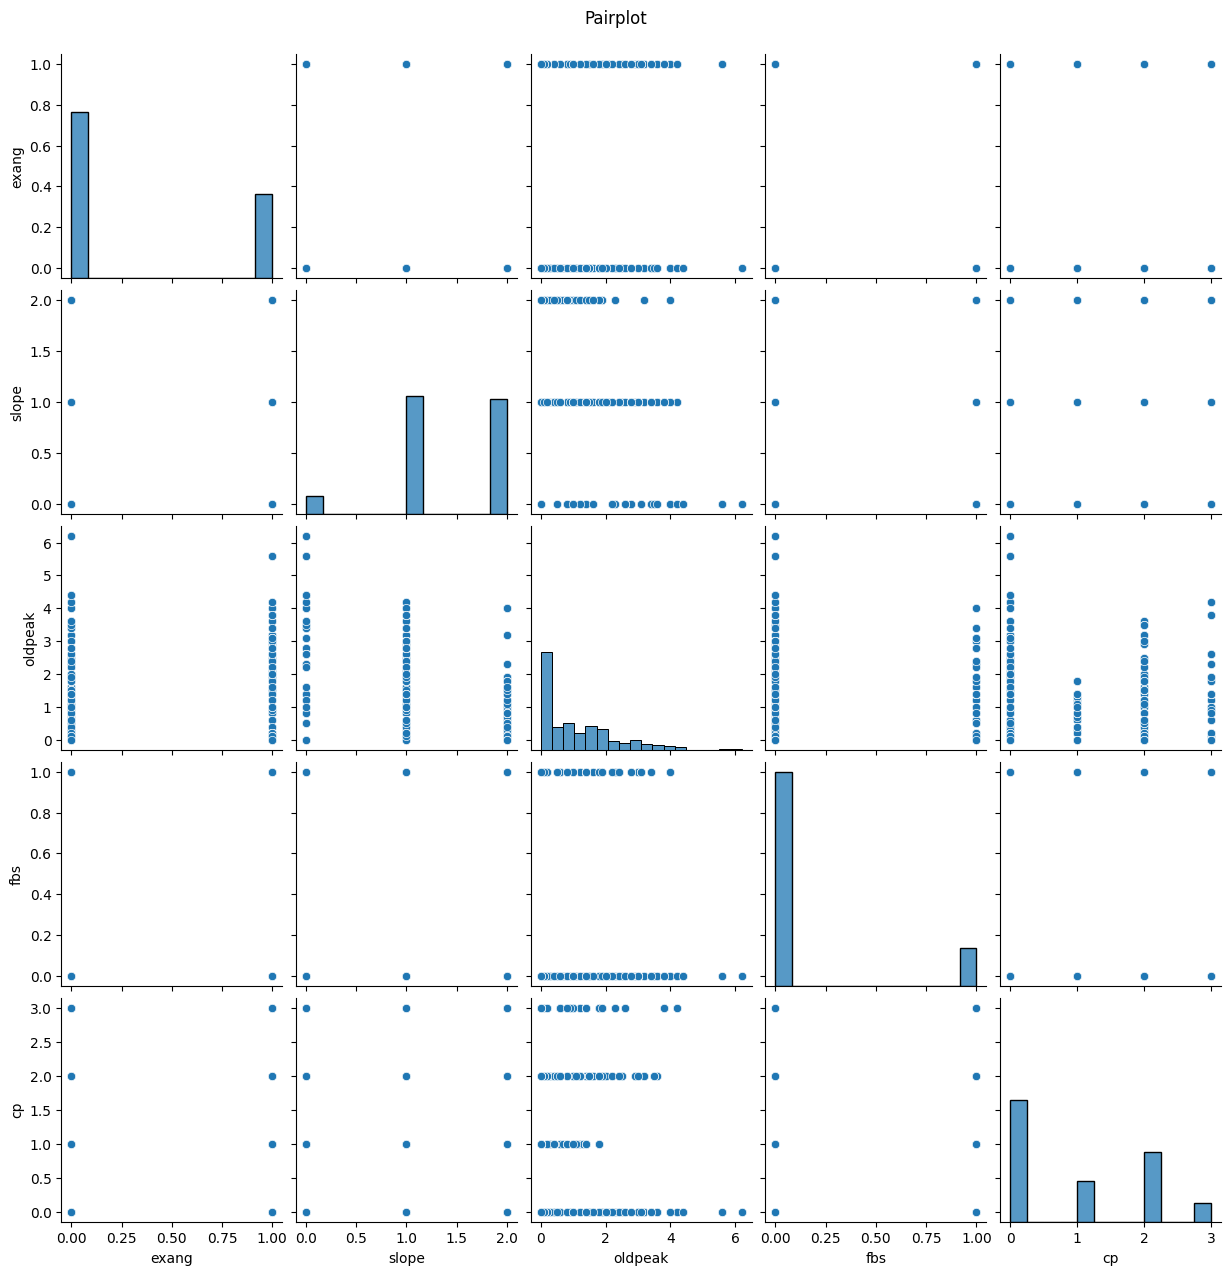

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Choisis les 5 variables que tu veux visualiser
colonnes = ['exang', 'slope', 'oldpeak', 'fbs', 'cp']  # remplace par tes noms de colonnes

# Sélection du sous-DataFrame
data_subset = data[colonnes]

# Pairplot
sns.pairplot(data_subset)
plt.suptitle("Pairplot", y=1.02)
plt.show()



## Clustering avec K-Means

K-Means est un algorithme de clustering non supervisé qui :
- Regroupe les données en **K clusters**.
- Minimise la **distance intra-cluster**.
- Dépend fortement du **choix de K**.

Dans ce notebook, K-Means est appliqué :
- Sur les **données originales**.
- Sur les **données après PCA**.


In [ ]:
import pandas as pd
from sklearn.datasets import load_iris


data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
#Missing values computation
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
import numpy as np

num_cols = data.select_dtypes(include=np.number).columns
cat_cols = data.select_dtypes(exclude=np.number).columns


In [ ]:
data = pd.get_dummies(data, drop_first=True)


In [ ]:
X= data.drop('target', axis=1)

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

## K-Means Before PCA

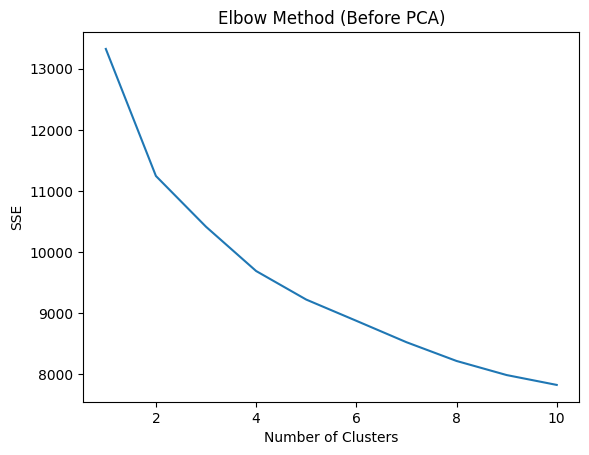

In [ ]:
sse = []

for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=30)
    km.fit(X)
    sse.append(km.inertia_)

plt.plot(range(1, 11), sse)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Elbow Method (Before PCA)")
plt.show()

In [ ]:
k = 2
kmeans_original = KMeans(n_clusters=k, random_state=42, n_init=10,
    )
labels_original = kmeans_original.fit_predict(X)

In [ ]:
sil_before = silhouette_score(X, labels_original)
sil_before

np.float64(0.1700813691485787)

In [ ]:
from sklearn.metrics import davies_bouldin_score

d_score_b = davies_bouldin_score(X, labels_original)
print("Davies-Bouldin Index :", d_score_b)


Davies-Bouldin Index : 2.1935780280631887


In [ ]:
from sklearn.metrics import calinski_harabasz_score

mask = labels_original != -1
c_score_b = calinski_harabasz_score(X, labels_original)
print("Calinski-Harabasz Index :", c_score_b)

Calinski-Harabasz Index : 189.21984388678212


## DBSCAN Before PCA

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)


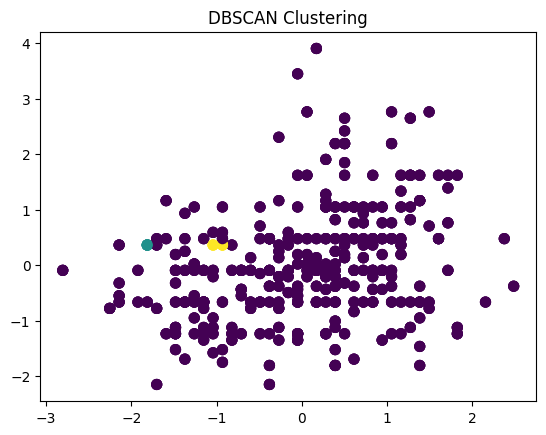

In [ ]:
plt.scatter(X[:, 0], X[:, 3], c=labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

# On ignore les points bruit (-1)
mask = labels != -1
score_s_b = silhouette_score(X[mask], labels[mask])
print("Silhouette Score:", score_s_b)


Silhouette Score: 0.9897319246083487


In [ ]:
from sklearn.metrics import davies_bouldin_score

mask = labels != -1
dd_score_b = davies_bouldin_score(X[mask], labels[mask])
print("Davies-Bouldin Index :", dd_score_b)


Davies-Bouldin Index : 0.019969366593904473


In [ ]:
from sklearn.metrics import calinski_harabasz_score

mask = labels != -1
dc_score_b = calinski_harabasz_score(X[mask], labels[mask])
print("Calinski-Harabasz Index :", dc_score_b)

Calinski-Harabasz Index : 17195.509247385362


## PCA Transformation

In [ ]:
pca = PCA()
X_pca_full = pca.fit_transform(X)

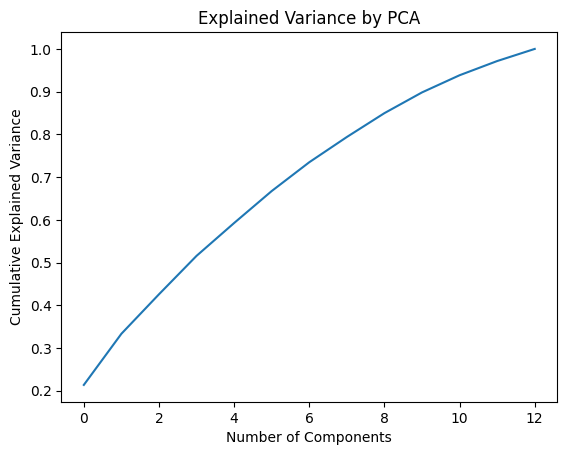

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA")
plt.show()

In [ ]:
X_pca = X_pca_full[:, :2]

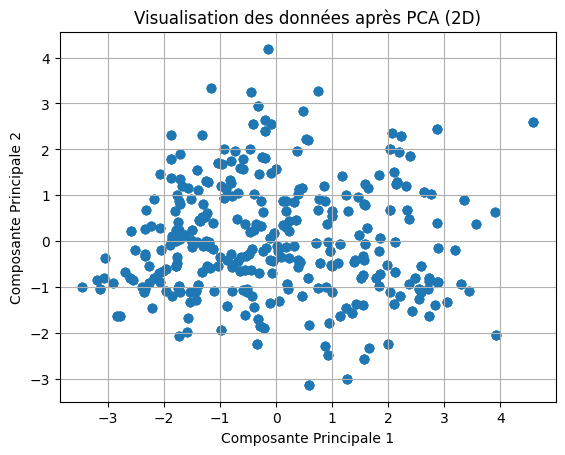

In [ ]:

try:
    import matplotlib.pyplot as plt

    plt.figure()
    plt.scatter(X_pca[:, 0], X_pca[:, 1])
    plt.title("Visualisation des données après PCA (2D)")
    plt.xlabel("Composante Principale 1")
    plt.ylabel("Composante Principale 2")
    plt.grid(True)
    plt.show()
except Exception as e:
    print("Impossible d'afficher la visualisation PCA :", e)


## K-Means After PCA

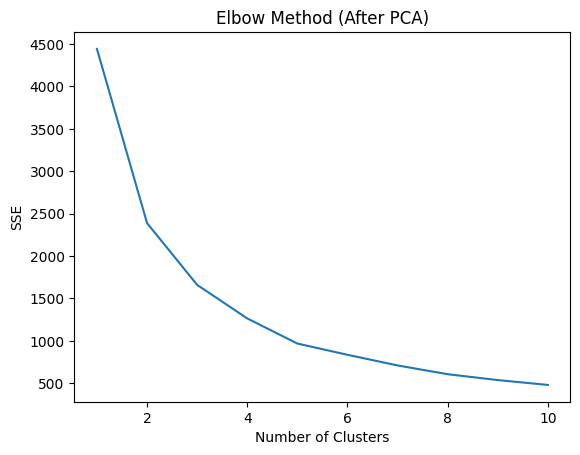

In [ ]:
sse_pca = []

for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=30)
    km.fit(X_pca)
    sse_pca.append(km.inertia_)

plt.plot(range(1, 11), sse_pca)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Elbow Method (After PCA)")
plt.show()

In [ ]:
kmeans_pca = KMeans(n_clusters=2, random_state=42, n_init=10,
    )
labels_pca = kmeans_pca.fit_predict(X_pca)

In [ ]:
sil_after = silhouette_score(X_pca, labels_pca)
sil_after

np.float64(0.42424097153844176)

In [ ]:
from sklearn.metrics import davies_bouldin_score

d_score = davies_bouldin_score(X_pca, labels_pca)
print("Davies-Bouldin Index :", d_score)


Davies-Bouldin Index : 0.9300908179122973


In [ ]:
from sklearn.metrics import calinski_harabasz_score

c_score = calinski_harabasz_score(X_pca, labels_pca)
print("Calinski-Harabasz Index :", c_score)


Calinski-Harabasz Index : 879.6169216600167


## Visualization

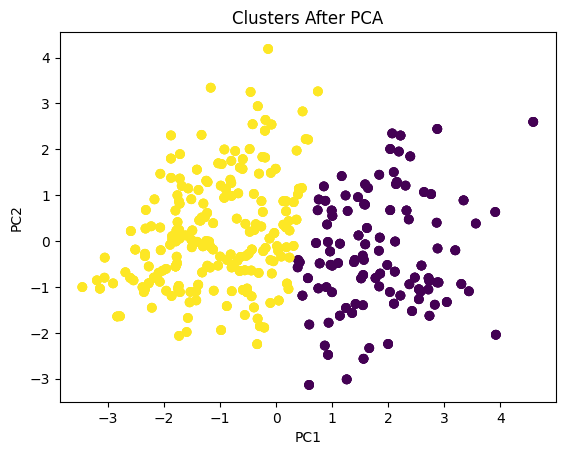

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pca)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters After PCA")
plt.show()

## DBSCAN After PCA

In [ ]:
dbscan_pca = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan_pca.fit_predict(X_pca)

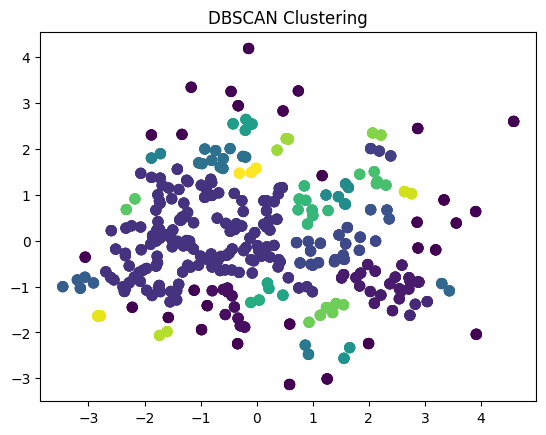

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.show()

In [ ]:
mask = labels != -1
s_score = silhouette_score(X_pca[mask], labels[mask])
print("Silhouette Score:", s_score)

Silhouette Score: 0.05358532204662279


In [ ]:
from sklearn.metrics import davies_bouldin_score

mask = labels != -1
dd_score = davies_bouldin_score(X_pca[mask], labels[mask])
print("Davies-Bouldin Index :", dd_score)


Davies-Bouldin Index : 0.6300015482905935


In [ ]:
from sklearn.metrics import calinski_harabasz_score

mask = labels != -1
dc_score = calinski_harabasz_score(X_pca[mask], labels[mask])
print("Calinski-Harabasz Index :", dc_score)

Calinski-Harabasz Index : 140.13713574944265


## Final Comparison

In [ ]:
results = pd.DataFrame({
    "Method": ["K-Means Only", "PCA + K-Means"],
    "Silhouette Score": [sil_before, sil_after],
    "Davies-Bouldin Index": [d_score_b, d_score],
    "Calinski-Harabasz Index": [c_score_b, c_score]

})

results

,Method,Silhouette Score,Davies-Bouldin Index,Calinski-Harabasz Index
0,K-Means Only,0.170081,2.193578,189.219844
1,PCA + K-Means,0.424241,0.930091,879.616922


In [ ]:
results = pd.DataFrame({
    "Method": ["DBSCAN Only", "PCA + DBSCAN"],
    "Silhouette Score": [score_s_b, s_score],
    "Davies-Bouldin Index": [dd_score_b, dd_score],
    "Calinski-Harabasz Index": [dc_score_b, dc_score]

})

results

,Method,Silhouette Score,Davies-Bouldin Index,Calinski-Harabasz Index
0,DBSCAN Only,0.989732,0.019969,17195.509247
1,PCA + DBSCAN,0.053585,0.630002,140.137136


In [ ]:
import joblib
from sklearn.cluster import DBSCAN

# Exemple de modèle

# Sauvegarder dans un fichier .pkl
joblib.dump(scaler, 'scaler_model.pkl')
joblib.dump(kmeans_pca, 'kmeans_model.pkl')
joblib.dump(dbscan, 'dbscan_model.pkl')
joblib.dump(pca, 'pca.pkl')

print("Modèle sauvegardé !")


Modèle sauvegardé !



## Métriques d’évaluation du Clustering

### 1. Silhouette Score
- Vraie mesure de qualité du clustering.
- Intervalle : **[-1, 1]**
- Plus le score est proche de **1**, meilleur est le clustering.

### 2. Davies-Bouldin Index
- Plus il est **petit**, meilleur est le clustering.

### 3. Calinski-Harabasz Index
- Plus il est **grand**, meilleur est le clustering.

Ces métriques sont complémentaires et permettent une évaluation robuste.


# Interprétation des Résultats de Clustering

## 1. Résultats obtenus

### K-Means

| Méthode | Silhouette | Davies-Bouldin | Calinski-Harabasz |
|--------|------------|----------------|-------------------|
| K-Means seul | 0.170 | 2.194 | 189.22 |
| PCA + K-Means | 0.424 | 0.930 | 879.62 |

### DBSCAN

| Méthode | Silhouette | Davies-Bouldin | Calinski-Harabasz |
|--------|------------|----------------|-------------------|
| DBSCAN seul | 0.989 | 0.019 | 17195.51 |
| PCA + DBSCAN | 0.054 | 0.630 | 140.14 |

---

## 2. Interprétation de K-Means

### K-Means sans PCA

- Silhouette = 0.17  
  Clusters très mal séparés.

- Davies-Bouldin = 2.19  
  Fort chevauchement entre les clusters.

- Calinski-Harabasz = 189  
  Structure globale très faible.

**Conclusion :**  
K-Means est peu performant sur les données brutes, à cause des corrélations entre variables, de l’échelle des features et du bruit.

---

### PCA + K-Means

- Silhouette = 0.424  
  Bonne séparation.

- Davies-Bouldin = 0.93  
  Clusters beaucoup plus compacts.

- Calinski-Harabasz = 879  
  Structure globale très nette.

**Conclusion :**  
L’application de la PCA améliore fortement la qualité du clustering K-Means. La réduction de dimension supprime le bruit, les redondances et améliore la séparation des groupes.

La PCA est indispensable pour K-Means sur ce jeu de données.

---

## 3. Interprétation de DBSCAN

### DBSCAN sans PCA (résultat exceptionnel)

- Silhouette = 0.989  
  Séparation quasi parfaite.

- Davies-Bouldin = 0.019  
  Clusters extrêmement compacts.

- Calinski-Harabasz = 17195  
  Structure de clustering extrêmement forte.

**Conclusion :**  
DBSCAN est parfaitement adapté aux données originales. Les densités naturelles sont très bien détectées, avec très peu de chevauchement et une séparation quasi parfaite entre les groupes. Cela indique l’existence de structures de densité très nettes dans les données.

C’est le meilleur modèle de tout le benchmarking.

---

### PCA + DBSCAN (chute majeure des performances)

- Silhouette = 0.054  
  Séparation quasi inexistante.

- Davies-Bouldin = 0.63  
  Clusters peu distincts.

- Calinski-Harabasz = 140  
  Structure très faible.

**Conclusion :**  
La PCA détruit ici l’information de densité nécessaire à DBSCAN. En projetant les données dans un espace de dimension réduite, les régions denses sont fusionnées, ce qui rend l’algorithme incapable de détecter correctement les clusters.

La PCA est nuisible à DBSCAN dans ce cas précis.

---

## 4. Comparaison finale des modèles

| Modèle | Qualité globale | Robustesse | Séparation |
|--------|------------------|------------|------------|
| K-Means seul | Faible | Faible | Mauvaise |
| PCA + K-Means | Bonne | Bonne | Bonne |
| DBSCAN seul | Excellente | Très robuste | Quasi parfaite |
| PCA + DBSCAN | Mauvaise | Faible | Très mauvaise |

---

## 5. Conclusion générale (Synthèse)

Les résultats montrent clairement que DBSCAN appliqué sur les données originales est le modèle le plus performant, avec une séparation presque parfaite des clusters. En revanche, K-Means nécessite impérativement une réduction de dimension par PCA pour obtenir des performances acceptables. L’application de la PCA est bénéfique pour les méthodes basées sur la distance euclidienne (comme K-Means), mais elle est destructive pour les méthodes basées sur la densité (DBSCAN), car elle modifie la structure locale des données.
